# Option Pricing analytically and with binomial trees

In [2]:
import numpy as np
import scipy as si
import numpy as np
import sympy as sy
import scipy.stats

In [3]:
import math 


In [4]:
# for the 0 task you can use this function to calculate CDF of a Normal distribution

si.stats.norm.cdf(0)

0.5

In [5]:
# and these for Monte carlo methods 

print(np.linspace(0, 1, 8))
print(np.random.normal(size=8))

[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
[-0.01255256 -0.63176327 -0.71226797 -0.64226972 -1.39912021  2.67773081
  2.1395963  -0.99492073]


In [6]:
option = 'call'

In [7]:
# templates for tasks 0, 2, 7

def euro_vanilla_analytical(S, K, T, r, sigma, option='call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset

    S = float(S)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call_price = - K * np.exp(-r * T) * si.stats.norm.cdf(d2, 0.0, 1.0) + S * si.stats.norm.cdf(d1, 0.0, 1.0)
    put_price = K * np.exp(-r * T) * si.stats.norm.cdf(-d2, 0.0, 1.0) - S * si.stats.norm.cdf(-d1, 0.0, 1.0)
    
    if option == 'call':
        return call_price
    elif option == 'put':
        return put_price
    else:
        print("Set the option type correctly")
        
    


def euro_vanilla_binomial(S, K, T, r, sigma, N, option = 'put', am = False):
    """
    Price an option using the Binomial Options Pricing model
    S: initial spot price of stock
    K: strick price of option
    sigma: volatility
    r: risk-free interest rate
    t: time to maturity (in years)
    call: 1 if call option, -1 if put
    n: binomial steps
    am: True for American option, False for European option
    """
   
    delta = float(T) / float(N)
    u = float(math.exp(sigma * math.sqrt(delta)))
    d = float(1) / u
    q = float((math.exp((r) * delta) - d)) / (u - d)  # Prob. of up step
    stock_val = np.zeros((N + 1, N + 1))
    opt_val = np.zeros((N + 1, N + 1))
    
    if option == 'call':
        kk = 1
    elif option == 'put':
        kk = -1
    else:
        print("again")

    # Calculate stock value at maturity
    stock_val[0, 0] = S
    for i in range(1, N + 1):
        stock_val[i, 0] = stock_val[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_val[i, j] = stock_val[i - 1, j - 1] * d

    # Recursion for option price
    for j in range(N + 1):
        opt_val[N, j] = max(0, kk*(stock_val[N, j] - K))
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            opt_val[i, j] = \
                (q * opt_val[i + 1, j] + (1 - q) * opt_val[i + 1, j + 1]) \
                / math.exp(r * delta)
            if am:
                opt_val[i, j] = max(opt_val[i, j], kk*(stock_val[i, j] - K))
    return opt_val[0, 0]




def euro_vanilla_mc(S, K, T, r, sigma, option='call', n_periods=10, n_samples=10**3):
    
    return 0

In [8]:
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25
option = 'call'

euro_vanilla_analytical(S, K, T, r, sigma, option)

0.027352509369436617

In [9]:
#сравнение на точность 1000 повторений 
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25
N=1000
euro_vanilla_binomial(S, K, T, r, sigma, N, option, am = False)

0.02717462872809896

In [10]:
#сравнение на точность 100 повторений
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25
N=100
euro_vanilla_binomial(S, K, T, r, sigma, N, option, am = False)

0.02554766502703116

In [11]:
#сравнение 1000 повторений
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25
N=1000
euro_vanilla_binomial(S, K, T, r, sigma, N, option, am = False)

0.02717462872809896

In [12]:
option

'call'

In [13]:
#сравнение 1000 повторений
option = 'put'
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25
N=1000
euro_vanilla_binomial(S, K, T, r, sigma, N, option, am = False)

45.150117078796875

# Importing libraries and defining functions

In [16]:
import numpy as np
import scipy as sp
from scipy import stats
import math as m

import matplotlib.pyplot as plt
%matplotlib inline
from time import time

In [17]:
def N(x):
    return stats.norm.cdf(x, 0.0, 1.0)

def NPrime(x):
    return stats.norm.pdf(x, 0.0, 1.0)

def bsm_d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))

def bsm_d2(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))

def bsm_pv(isCall, S, K, T, r, q, sigma):
    d1 = bsm_d1(S, K, T, r, q, sigma)
    d2 = bsm_d2(S, K, T, r, q, sigma)
    if isCall:
        return S * N(d1) * m.exp(-q * T) - K * m.exp(-r * T) * N(d2)
    else:
        return K * N(-d2) * m.exp(-r * T)  - S * m.exp(-q * T) * N(-d1)

def bsm_delta(isCall, S, K, T, r, q, sigma):
    d1 = bsm_d1(S, K, T, r, q, sigma)
    if isCall:
        return N(d1) * m.exp(-q * T)
    else:
        return -N(-d1) * m.exp(-q * T)
    
def bsm_gamma(isCall, S, K, T, r, q, sigma):
    d2 = bsm_d1(S, K, T, r, q, sigma)
    return NPrime(d2) * m.exp(-q * T) / (S * sigma * m.sqrt(T))
    
def bsm_vega(isCall, S, K, T, r, q, sigma):
    d1 = bsm_d1(S, K, T, r, q, sigma)
    return S * NPrime(d1) * m.sqrt(T)

In [18]:
def call_payoff(K, S):
    return np.maximum(S-K, 0)

# Pricing with particular values (Monte-Carlo simulation)

In [19]:
S0 = 80.; K = 85.; T = 1.0; r = 0.05; # q = 0.0;
sigma = 0.2

In [20]:
ref_pv = 5.98824380

In [21]:
def mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I):
    # Simulating I paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0
    dt = float(T) / M
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * m.sqrt(dt) * z)

    # PV is extected discounted payoff
    C = np.sum(m.exp(-r * T) * np.maximum(S[-1] - K, 0)) / I
    return C, S

In [23]:
# Parameters
M = 360; I = 100000

In [24]:
np.random.seed(12345)
t0 = time()
C, SPaths = mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

PV: 5.93754, abs diff: 0.05071, rel diff:  0.00854
Calculation time   1.82896


Text(0,0.5,'Spot')

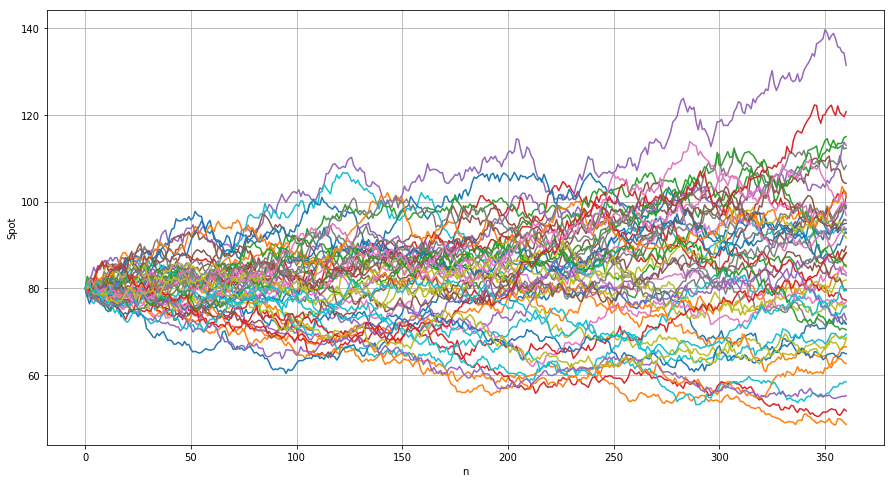

In [25]:
plt.figure(figsize=(15,8))
plt.plot(SPaths[:, :50])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

In [26]:
def mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I):
    # Simulating I values
    z = np.random.standard_normal(I)
    S = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * m.sqrt(T) * z)

    # payoff
    P = np.maximum(S - K, 0)
    # PV as expected discounted payoff
    C = np.sum( m.exp(-r * T) * P ) / I
    return C, S

np.random.seed(12345)
t0 = time()
C, S = mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

PV: 5.98965, abs diff: -0.00141, rel diff:  -0.00024
Calculation time   0.01299


Text(0,0.5,'Spot')

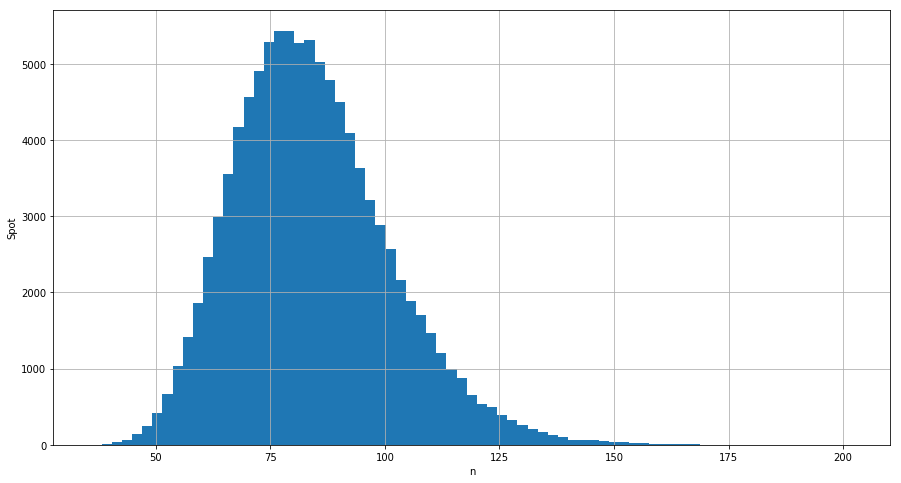

In [27]:
plt.figure(figsize=(15,8))
plt.hist(S, 75)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

Text(0,0.5,'Spot')

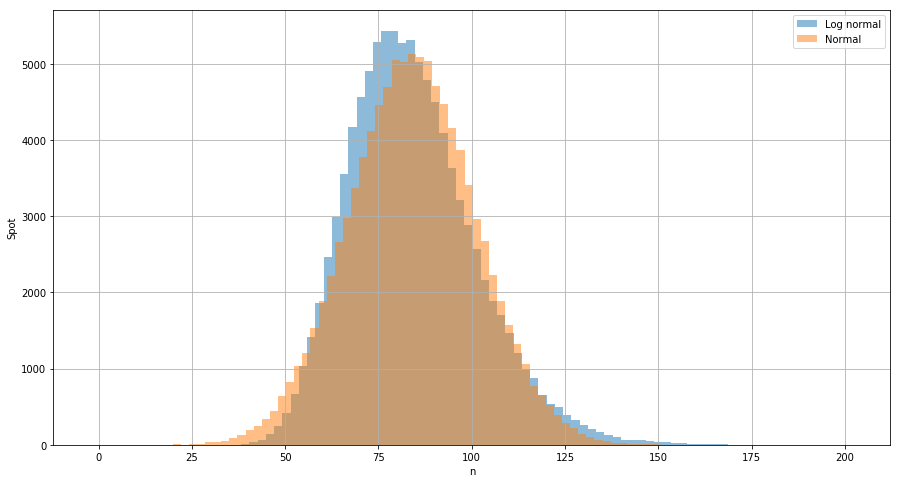

In [28]:
z = np.random.standard_normal(I)
z = z * np.std(S)
z = z + np.mean(S)

plt.figure(figsize=(15,8))
plt.hist(S, 75, alpha=0.5, label='Log normal')
plt.hist(z, 75, alpha=0.5, label='Normal')

plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

In [29]:
print( "Expected mean: %.5f, mean: %.5f" % (S0 * m.exp(r*T), np.mean(S)) )
print( "Expected std: %.5f, std:  %.5f" % ( S0* m.exp(r*T ) * m.sqrt(m.exp( sigma * sigma *T ) - 1) , np.std(S)) )

Expected mean: 84.10169, mean: 84.08921
Expected std: 16.98995, std:  17.01519
